In [1]:
import sys
sys.path.append('..')

# Ensembles 1: Random forests

## Learning objectives
- understand 
    - bootstrapping datasets
    - building ensembles by aggregating predictions
    - bagging
    - random forests
- implement
    - your first esemble
    - a random forests

## Intro - ensembles
### "The collective is smarter than the individual"


If we attempted to build an ensemble with multiple instances of the same model on the same dataset, this wouldn't help. 
Why?
Because they would all be identical (other than the differences induced by any stochastisity in the optimisation process).
This means that they would all make the same mistakes, and combining their predictions would not give any improvement.

### Why do ensembles work?
Mathematically, ensembles work because the mistakes made between models are not correlated.
This is because all of the errors are correlated.

To make sure the model errors are not correlated, we can't just train the same model on the same dataset, otherwise all of the errors would be the same for each model.
We can make the predictions differ (and uncorrelate the errors) in different ways, some of which we discuss below. 

### Bootstrapping datasets and bagging
The first way that we can make the models differ is by training them on different data.
We can "bootstrap" new datasets by sampling with replacement from the existing datasets.
Bootstrapping datasets to train different models on and aggregating their results is known as bootstrap aggregating or **bagging**.

Let's get our data and make some bootstrapped datasets

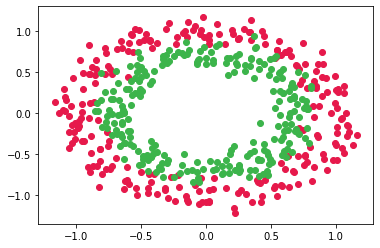

In [2]:
import numpy as np
np.set_printoptions(suppress=True)
import matplotlib.pyplot as plt
import sklearn.datasets
from get_colors import colors
from utils import get_classification_data, show_data

def create_bootstrapped_dataset(existing_X, existing_Y, size, sample_weights=None):
    """Create a single bootstrapped dataset"""
    idxs = np.random.choice(np.arange(len(existing_X)), size=size, replace=True)
    return existing_X[idxs], existing_Y[idxs]

def create_bootstrapped_datasets(X, Y, n_datasets, dataset_size):
    """Create n bootstrapped datasets"""
    datasets = []
    for d in range(n_datasets):
        x, y = create_bootstrapped_dataset(X, Y, size=dataset_size)
        datasets.append((x, y))
    return datasets

m = 500
X, Y = get_classification_data(m=m, variant='circles', noise=0.1, factor=0.7)
show_data(X, Y)
n_trees = 10
dataset_size = int(m / 5)
bootstrapped_datasets = create_bootstrapped_datasets(X, Y, n_trees, dataset_size)

## Let's firstly use a single decision tree to make predictions

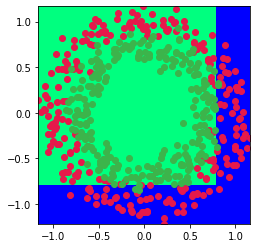

In [10]:
import sklearn.tree
from utils import visualise_predictions

tree = sklearn.tree.DecisionTreeClassifier(max_depth=2) # try with large depth and then low depth
tree.fit(X, Y)
visualise_predictions(tree.predict, X, Y)

The main problem with decision trees is that they extremely susceptible to overfitting. 
That is, these models often have high variance.
One way that we could reduce variance would be by reducing the max depth of the tree.
But this would reduce the capacity of the model and increase it's bias.
The classic trade-off.

We can try to reduce both variance and bias by ensembling multiple decision trees in what is called a **random forest**


## Random forests
Random forests are ensembles of decision trees (many trees make a forest).

### Learning on feature subsets
Another way that we can make the predictions differ, and further uncorrelate errors, is by only allowing the model to make predictions based on a limited number of the features. 
That is, we train each model on the features of examples from the dataset that have been projected into a subspace of the feature space.

To recap, the randomness in random forests is induced in two ways:
1. By training each tree on a random dataset, bootstrapped from the original
2. By having each tree project the data into a subspace of feature space before fitting it

## Implementation of random forest from scratch

Let's use the sklearn `DecisionTreeClassifier` as our model, and train an ensemble of them on different random subspaces of features to create a random forest.

In [11]:
def project_into_subspace(X, feature_idxs):
    """
    Returns only the features of a dataset X at the indices provided 
    feature_idxs should be a list of integers representing the indices of the features that should remain 
    """
    return X[:, feature_idxs] # slice out wanted features, forget the others

projected_X = project_into_subspace(X, [0])
print(projected_X)
print(X)

6]
 [ 0.67342088]
 [-0.5745822 ]
 [ 0.51438554]
 [-0.37907526]
 [-0.09960504]
 [-0.8456931 ]
 [ 0.75892223]
 [ 0.41014867]
 [ 0.58369005]
 [ 0.99239619]
 [-0.69484533]
 [-0.43350825]
 [ 1.10237777]
 [-0.79790322]
 [-0.83888914]
 [-0.89217068]
 [-0.16534704]
 [-0.52792581]
 [ 0.38918481]
 [ 0.02507196]
 [-0.32883994]
 [ 0.71409117]
 [-0.52311739]
 [-0.44389272]
 [ 0.25674923]
 [-0.09884295]
 [-0.23976253]
 [ 0.1561239 ]
 [-0.81207774]
 [-0.7238546 ]
 [ 0.02411276]
 [ 0.05316339]
 [-0.40466759]
 [-0.61565696]
 [ 0.89049363]
 [ 0.08700601]
 [-0.64814527]
 [-0.94608397]
 [ 0.12310582]
 [ 0.54464696]
 [ 0.18193407]
 [ 0.46659745]
 [ 0.21803299]
 [-0.10563049]
 [ 0.69594929]
 [ 0.47759334]
 [-0.47549714]
 [ 0.60588805]
 [ 0.25370098]
 [ 0.5793318 ]
 [-0.20330858]
 [ 1.08264928]
 [ 0.86280704]
 [ 0.40272929]
 [-0.08251508]
 [ 0.31791881]
 [-0.01911853]
 [ 0.77367459]
 [-0.06913599]
 [-0.51238146]
 [-0.74364352]
 [-0.73303097]
 [-0.85450576]
 [ 0.34165342]
 [ 0.60709232]
 [-0.59442736]
 [ 0.76

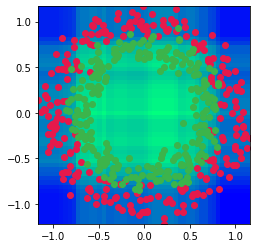

forest: [
    {
        "depth": 2,
        "features": [
            0
        ]
    },
    {
        "depth": 2,
        "features": [
            0
        ]
    },
    {
        "depth": 2,
        "features": [
            1
        ]
    },
    {
        "depth": 2,
        "features": [
            0
        ]
    },
    {
        "depth": 2,
        "features": [
            1
        ]
    },
    {
        "depth": 2,
        "features": [
            0
        ]
    },
    {
        "depth": 2,
        "features": [
            1
        ]
    },
    {
        "depth": 2,
        "features": [
            1
        ]
    },
    {
        "depth": 2,
        "features": [
            0
        ]
    },
    {
        "depth": 2,
        "features": [
            0
        ]
    },
    {
        "depth": 2,
        "features": [
            1
        ]
    },
    {
        "depth": 2,
        "features": [
            0
        ]
    },
    {
        "depth": 2,
        "feature

In [13]:
import json

class RandomForest:
    def __init__(self, n_trees=10, max_depth=4, max_samples=10):
        self.n_trees = n_trees # how many trees in the forest
        self.max_depth = max_depth # what is the max depth of each tree
        self.trees = [] # init an empty list of trees
        self.max_samples = max_samples # how many samples from the whole dataset should each tree be trained on

    def fit(self, X, Y):
        """Fits a bunch of decision trees to input X and output Y"""
        bootstrapped_datasets = create_bootstrapped_datasets(X, Y, n_datasets=self.n_trees, dataset_size=self.max_samples) # make bootstrapped datasets
        for tree_idx, bootstrapped_dataset in enumerate(bootstrapped_datasets): # for each bootstrapped dataset
            bootstrapped_X = bootstrapped_dataset[0] # get features
            bootstrapped_Y = bootstrapped_dataset[1] # get labels
            n_features = np.random.choice(range(1, bootstrapped_X.shape[1])) # choose how many features this tree will use to make predictions
            subspace_feature_indices = np.random.choice(range(bootstrapped_X.shape[1]), size=n_features) # randomly choose that many features to use as inputs
            projected_X = project_into_subspace(bootstrapped_X, subspace_feature_indices) # remove unused features from the dataset
            tree = sklearn.tree.DecisionTreeClassifier(max_depth=self.max_depth) # init a decision tree
            tree.fit(projected_X, bootstrapped_Y) # fit the tree on these examples
            tree.feature_indices = subspace_feature_indices # give the tree a new attribute: which features were used 
            self.trees.append(tree) # add this tree to the list of trees

    def predict(self, X):
        """Uses the fitted decision trees to return predictions"""
        predictions = np.zeros((len(X), self.n_trees)) # empty array of prediction with shape n_examples x n_trees
        for tree_idx, tree in enumerate(self.trees): # for each tree in our forest
            x = project_into_subspace(X, tree.feature_indices) # throw away some features of each input example for this tree to predict based on those alone
            predictions[:, tree_idx] = tree.predict(x) # predict integer label
        prediction = np.mean(predictions, axis=1) # average predictions from different models
        # prediction = np.round(prediction).astype(int) # comment this line to show probability confidences of predictions rather than integer predictions
        return prediction

    def __repr__(self):
        """Returns a string representation of the random forest"""
        forest = [] # init empty list of trees
        for idx, tree in enumerate(self.trees): # for each tree in the forest
            forest.append({ # add a dictionary of info about the tree
                'depth': tree.max_depth, # how many binary splits?
                'features': tree.feature_indices.tolist() # which features is it using
            })
        return json.dumps(forest, indent=4)

randomForest = RandomForest(n_trees=80, max_depth=2, max_samples=10) # fit lots of very weak (depth=2) learners
randomForest.fit(X, Y) # fit model
randomForest.predict(X) # make predictions
visualise_predictions(randomForest.predict, X, Y) # visualise
print('forest:', randomForest) # use our __repr__ method to visualise the tree

As shown by the visualisation of our predictions above, the decision boundary of the ensemble is far more complex than that of the single model alone.
That is, the capacity of the ensemble can be much greater than the capacity of the individual model.
Ensembling can turn lots of "weak learners" into "strong learners".

Play around with the ensemble hyperparameters and see how well you can approximate an eliptical decision boundary.

## Sklearn implementation


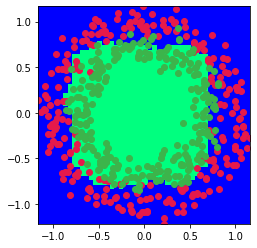

0.882

In [7]:
from sklearn.ensemble import RandomForestClassifier

randomForest = RandomForestClassifier(n_estimators=80, max_depth=2, max_samples=10) # init random forest
randomForest.fit(X, Y) # fit random forest of decision trees
visualise_predictions(randomForest.predict, X, Y) # visualise
randomForest.score(X, Y) # use the model's score method to compute it's accuracy

## Summary
- Ensemble models are those which combine the predictions of multiple models to make a prediction
- Random forests are en example of an ensemble model which combine the predictions made by decision trees
- The randomness of random forests come from:
    - each tree being trained on a bootstrapped dataset
    - each tree being trained on a subset of features of each example
- Random forests enseble lots of weak models to form a stronger model with greater representational capacity
- Ensembling weak (low capacity) models can reduce the variance in their predictions, hence ensembling is a form of regularisation
